# DATA LOADING

## DEFINE LIBRARY

In [1]:
import pandas as pd # for creating table and manipulating data inside the table
from scipy import stats # for statistical analysis purpose
import matplotlib.pyplot as plt # for data visualization purpose
import math # for basic math function

## LOAD DATA

### TABLE BY AGE

In [2]:
df_1 = pd.read_csv("Enter_korea_by_age.csv")

### TABLE BY GENDER

In [3]:
df_2 = pd.read_csv("Enter_korea_by_gender.csv")

### TABLE BY PURPOSE

In [4]:
df_3 = pd.read_csv("Enter_korea_by_purpose.csv")

### ALL TABLE JOINED

In [5]:
df = df_1.merge(df_2, how='inner')
df = df.merge(df_3, how='inner')

## DATA EXPLORATION

### DATA CONTENT

In [6]:
df

,date,nation,visitor,growth,share,age0-20,age21-30,age31-40,age41-50,age51-60,age61,male,female,crewman,tourism,business,official affairs,studying,others
0,2019-1,China,392814,28.737870,35.555117,36520,108591,103657,48574,40893,40998,147511,231722,13581,320113,2993,138,8793,60777
1,2019-1,Japan,206526,23.606830,18.693468,18015,57921,34165,39811,33857,20330,75070,129029,2427,198805,2233,127,785,4576
2,2019-1,Taiwan,87954,16.003693,7.961057,18888,17927,18595,18862,8169,4566,30805,56202,947,86393,74,22,180,1285
3,2019-1,Hong Kong,35896,3.533212,3.249086,3890,11384,7400,5461,4629,2137,12172,22729,995,34653,59,2,90,1092
4,2019-1,Macao,2570,-12.376406,0.232621,223,1013,762,264,181,92,748,1787,35,2506,2,0,17,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2020-4,Oceania others,13,-97.239915,0.044195,0,0,0,0,0,0,0,0,13,0,0,0,0,13
956,2020-4,South Africa,22,-98.101812,0.074792,0,1,4,0,0,0,3,2,17,2,0,0,0,20
957,2020-4,Africa others,177,-95.412131,0.601734,3,9,16,6,2,0,30,6,141,11,5,0,11,150
958,2020-4,Stateless,3,-95.312500,0.010199,0,0,0,0,0,0,0,0,3,0,0,0,0,3


### DATA CONTEXT

```
This dataset deals with the visitors of foreigners into South Korea.

It includes foreigners(not Korean), overseas Koreans and crew members, except for some of the foreign arrivals who are not considered tourists (diplomats, soldiers, permanent residents, visiting cohabitation and residence).

The Korea Tourism Organization (KTO) has compiled, analyzed, and provided statistics on foreign tourists visiting Korea and overseas tourists by type.
```

### DATA INFORMATION

#### DATA DIMENSION

```
Data consist of
960 rows and 19 columns
```

#### COLUMN INFORMATION

```
date    : Date in (year - month - date) format
nation  : Country of departure
visitor : Number of visitors
growth  : Growth percentage in the number of visitors compared to the same month last year
share   : Percentage of all visitors in the month
```

# DATA PREPARATION

## DATA FRAME INFORMATION

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              960 non-null    object 
 1   nation            960 non-null    object 
 2   visitor           960 non-null    int64  
 3   growth            960 non-null    float64
 4   share             960 non-null    float64
 5   age0-20           960 non-null    int64  
 6   age21-30          960 non-null    int64  
 7   age31-40          960 non-null    int64  
 8   age41-50          960 non-null    int64  
 9   age51-60          960 non-null    int64  
 10  age61             960 non-null    int64  
 11  male              960 non-null    int64  
 12  female            960 non-null    int64  
 13  crewman           960 non-null    int64  
 14  tourism           960 non-null    int64  
 15  business          960 non-null    int64  
 16  official affairs  960 non-null    int64  
 1

```
From concise summary of the data :

- There's no null / missing data
- The date column value is still in the object type, it needs to be changed first to the date-time type.
```

## DATA CLEANING

In [8]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              960 non-null    datetime64[ns]
 1   nation            960 non-null    object        
 2   visitor           960 non-null    int64         
 3   growth            960 non-null    float64       
 4   share             960 non-null    float64       
 5   age0-20           960 non-null    int64         
 6   age21-30          960 non-null    int64         
 7   age31-40          960 non-null    int64         
 8   age41-50          960 non-null    int64         
 9   age51-60          960 non-null    int64         
 10  age61             960 non-null    int64         
 11  male              960 non-null    int64         
 12  female            960 non-null    int64         
 13  crewman           960 non-null    int64         
 14  tourism           960 non-

```
After we changed the date value to the date-time type, the data is ready to be analyzed.
```

In [ ]:
df.to_excel("tabel.xlsx") # export dataframe to excel format for tableau visualization

# DATA ANALYSIS

## VISITOR GROWTH OVERTIME

```
First we need to examine visitor growth overtime to analyze trends.

To analyze visitor growth overtime we need to set our metrics which in this case :
- date
- growth level

data then grouped by date and growth level aggregated by averaging it.
```

In [ ]:
growth = df[['date','growth']]
growth = growth.groupby(['date']).mean()
growth = growth.reset_index()
growth.head(10) # only show first 10 data for visual purpose

,date,growth
0,2019-01-01,2.032081
1,2019-02-01,-5.504321
2,2019-03-01,0.129832
3,2019-04-01,14.086335
4,2019-05-01,4.969710
5,2019-06-01,8.410194
6,2019-07-01,5.736133
7,2019-08-01,15.572962
8,2019-09-01,15.625084
9,2019-10-01,6.876105


```
To make the data easier to see we can visualize it
```

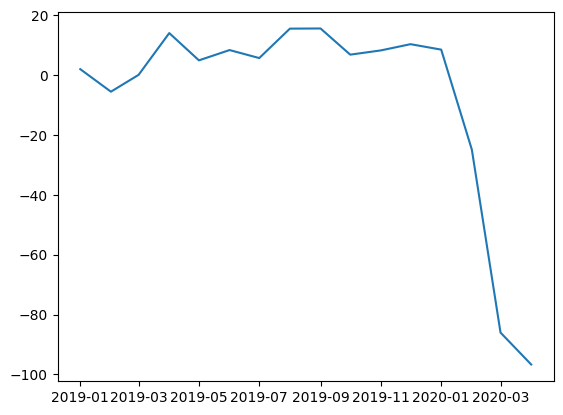

In [10]:
plt.plot(growth['date'],growth['growth'])
plt.show()

```
Line chart was chosen for this visualization because we showed growth value compared to date which is continuous
```

```
Currently, the trend of visitors is dropping drastically, and it is necessary to change the program to encourage an increase in visitor numbers again.
```

## VISITORS RANGE IN 2019 (Inferential Statistics)

```
Our goal is to increase the total number of visitors by 20%.
We need to determine the range of visitors in 2019 first.
That range will serve as our benchmark for the goal.
```

In [ ]:
range = df[['date','nation','visitor']][(df['date'].dt.year == 2019)]
range = range.groupby(['date']).sum()
range.head(5) # only show first 5 data for visual purpose

,nation,visitor
date,,
2019-01-01,ChinaJapanTaiwanHong KongMacaoPhillipinesIndon...,1104803
2019-02-01,ChinaJapanTaiwanHong KongMacaoPhillipinesIndon...,1201802
2019-03-01,ChinaJapanTaiwanHong KongMacaoPhillipinesIndon...,1535641
2019-04-01,ChinaJapanTaiwanHong KongMacaoPhillipinesIndon...,1635066
2019-05-01,ChinaJapanTaiwanHong KongMacaoPhillipinesIndon...,1485684


```
Check data central tendency
```

In [33]:
mean = range['visitor'].mean()
median = range['visitor'].median()
q1 = range['visitor'].quantile(0.25)
q3 = range['visitor'].quantile(0.75)
IQR = q3 - q1

print("Rata - rata jumlah pengunjung :",mean)
print("Median jumlah pengunjung :",median)
print("Q1 jumlah pengunjung :",q1)
print("Q3 jumlah pengunjung :",q3)
print("IQR jumlah pengunjung :",IQR)

Rata - rata jumlah pengunjung : 1458563.0
Median jumlah pengunjung : 1467941.0
Q1 jumlah pengunjung : 1454338.5
Q3 jumlah pengunjung : 1548305.5
IQR jumlah pengunjung : 93967.0


```
Check data skewness to determine data distribution normality
```

In [19]:
print("Skewness jumlah pengunjung di 2019 :",range['visitor'].skew())

Skewness jumlah pengunjung di 2019 : -1.1898050556963113


```
Data is indicated as skewed (data distribution is not normal)

Confidence interval for our range is calculated using:

Upper = Median + 1.7 * (1.25*IQR / 1.35*sqrt(N))

Lower = Median - 1.7 * (1.25*IQR / 1.35*sqrt(N))
```

In [21]:
N = len(range)

Upper = mean + 1.7 * (1.25*IQR / 1.35*math.sqrt(N))
Lower = median - 1.7 * (1.25*IQR / 1.35*math.sqrt(N))

print("Upper =",Upper)
print("Lower =",Lower)

Upper = 1970941.7981466702
Lower = 955562.2018533298


```
From the result of the calculation we can set our benchmark :
2019 visitors range (1970941.7981466702 - 955562.2018533298)
```

## MAIN REASON PEOPLE VISITING KOREA

```
To increase visitor numbers we need to improve visitors experience.

We can prioritize upgrading our facilities based on the reasons people visit the most.

To analyze the main reasons people visit Korea, we need to set our metrics, which in this case are:
- visitor numbers
- reasons
    * tourism
    * business
    * official affairs
    * studying
    * others
```

In [14]:
purpose = df[['visitor','tourism','business','official affairs','studying','others']].sum()
purpose

visitor             19573588
tourism             16003380
business              200011
official affairs       84477
studying              459678
others               2826042
dtype: int64

```
All the numbers can be overwhelming, so we will convert the values to percentages.
```

In [16]:
print(f"Percentage of visitors who come to Korea for tourism purposes :{(purpose['tourism']/purpose['visitor']*100):.2f}%")
print(f"Percentage of visitors who come to Korea for business purposes :{(purpose['business']/purpose['visitor']*100):.2f}%")
print(f"Percentage of visitors who come to Korea for official affairs purposes :{(purpose['official affairs']/purpose['visitor']*100):.2f}%")
print(f"Percentage of visitors who come to Korea for studying purposes : :{(purpose['studying']/purpose['visitor']*100):.2f}%")
print(f"Percentage of visitors who come to Korea for others purposes : :{(purpose['others']/purpose['visitor']*100):.2f}%")

Percentage of visitors who come to Korea for tourism purposes :81.76%
Percentage of visitors who come to Korea for business purposes :1.02%
Percentage of visitors who come to Korea for official affairs purposes :0.43%
Percentage of visitors who come to Korea for studying purposes : :2.35%
Percentage of visitors who come to Korea for others purposes : :14.44%


```
To make the data easier to see we can visualize it

But we need to remove the visitor value first because it contains the total sum of all reasons.
```

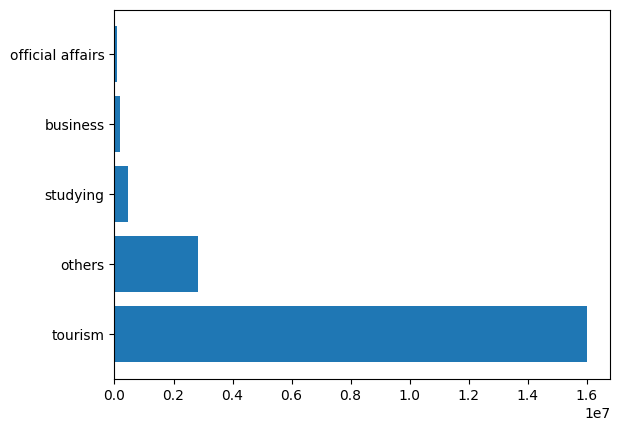

In [93]:
onlyPurpose = purpose.drop(['visitor'])
onlyPurpose = onlyPurpose.reset_index()
onlyPurpose = onlyPurpose.rename(columns={'index':"purpose",0:'total_visitors'})
onlyPurpose = onlyPurpose.sort_values('total_visitors',ascending=False)
plt.barh(onlyPurpose['purpose'],onlyPurpose['total_visitors'])
plt.show()

```
Bar horizontal chart was chosen for this visualization because we showed discrete value.
```

```
From the chart we can clearly see that most visitors come for tourism reason.
```

## NATION THAT CONTRIBUTES THE MOST VISITORS

```
To increase visitor numbers, we can establish tourism cooperation with other countries. 

**Collaboration to increase the number of foreign tourists visiting both countries**

We can prioritize tourism cooperation by analyzing which country contributes the most visitors.

To analyze which nation that contriutes the most visitor, we need to set our metrics, which in this case are:
- visitor numbers
- nation
```

In [90]:
nation = df[['nation','visitor']]
nation = nation.groupby(['nation']).sum()
nation = nation.sort_values(['visitor'],ascending=False)
nation = nation.reset_index()
nation.head(10) # only show first 10 data for visual purpose

,nation,visitor
0,China,6629318
1,Japan,3695581
2,Taiwan,1424629
3,USA,1170719
4,Hong Kong,783159
5,Thailand,644523
6,Vietnam,624921
7,Phillipines,560570
8,Malaysia,455722
9,Russia,400628


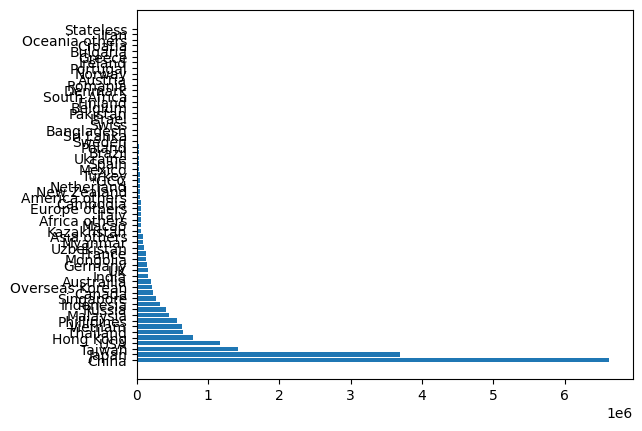

In [91]:
plt.barh(nation['nation'],nation['visitor'])
plt.show()

```
Bar horizontal chart was chosen for this visualization because we showed discrete value and we want to see the nation name clearly.

But as we can see here, it is quite overwhelming due to the large number of nations.

So we'll only show top 10 nation.
```

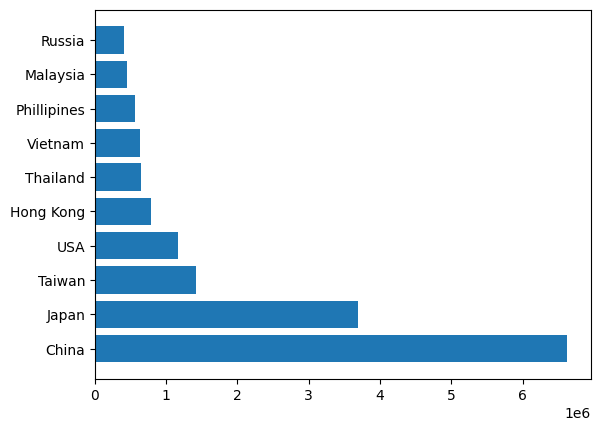

In [92]:
nation = nation.head(10)
plt.barh(nation['nation'],nation['visitor'])
plt.show()

```
Now it is easier to analyze.

As from chart we know the top 10 nation that contributes the most visitors.
```

## CONNECTION BETWEEN THE ORIGIN NATION AND THE REASON FOR THE VISIT (Descriptive Statistics)

```
We already analyze most visitor origin nation and the reason for the visit.

Now, we want to check if there is any connection between those two.

If there is a connection, we can create a program to strengthen it.
```

In [ ]:
corrNationVisitors = df[['nation','tourism','business','official affairs','studying','others']]
corrNationVisitors = corrNationVisitors.groupby(['nation']).sum()
corrNationVisitors = corrNationVisitors.reset_index()
print(corrNationVisitors.head(10)) # only show first 10 data for visual purpose

           nation  tourism  business  official affairs  studying  others
0            *GCC    34688       403               167      1320    1525
1   Africa others    22177     10585              1210      3652   16696
2  America others    35578       250               562      1586    9621
3     Asia others    35375      6386              3007      4239   35885
4      Austrailia   173354      1144               548       655   19297
5         Austria    11159        99                35       328    2471
6      Bangladesh     3520      1877              1254      1781   12392
7         Belgium    12758       259                67       452    2493
8          Brazil    20403       230               183       541    5763
9        Bulgaria     3546        32                46       107    3497


```
We're using the Kendall method because we want to compare one categorical value with five numerical values.

Why not use ANOVA ?
Because, as we can see from the reason data, it was not normally distributed.
```

In [49]:
# change nation category to code for kendall method
corrNationVisitors['nation'] = corrNationVisitors['nation'].astype('category').cat.codes
res = corrNationVisitors.corr(method='kendall')
res

,nation,tourism,business,official affairs,studying,others
nation,1.000000,0.037288,0.016949,-0.071812,-0.018089,0.090395
tourism,0.037288,1.000000,0.468927,0.440486,0.600339,0.481356
business,0.016949,0.468927,1.000000,0.527566,0.624082,0.492655
official affairs,-0.071812,0.440486,0.527566,1.000000,0.555021,0.502686
studying,-0.018089,0.600339,0.624082,0.555021,1.000000,0.466931
others,0.090395,0.481356,0.492655,0.502686,0.466931,1.000000


```
We got the correlation matrix.
We only want show nation correlation with all reasons
```

In [25]:
res = corrNationVisitors.corr(method='kendall')
print(res['nation'])

nation              1.000000
tourism             0.037288
business            0.016949
official affairs   -0.071812
studying           -0.018089
others              0.090395
Name: nation, dtype: float64


```
Based on the correlation results above, there is no relationship between the country of origin and the visitor's destination, as evidenced by the correlation value being very small and far from 1.
```

## PEOPLE CRITERIA THAT MOSTLY VISIT KOREA

```
Promotion and branding can be maximized by targeting the criteria of the most visitors.

In this case, the criteria are defined by gender and age.
```

In [96]:
people = df[['male','female']].sum()
age = df[['age0-20','age21-30','age31-40','age41-50','age51-60','age61']].sum()

### BY GENDER

In [54]:
print(f"The percentage of male visitors is {(people['male']/people.sum()*100):.2f}%")
print(f"The percentage of female visitors is {(people['female']/people.sum()*100):.2f}%")

The percentage of male visitors is 41.37%
The percentage of female visitors is 58.63%


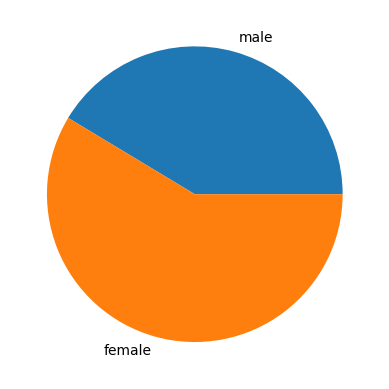

In [55]:
gender = ['male','female']
plt.pie(people,labels=gender)
plt.show()

```
Pie chart was chosen for this visualization because we want to showed portion of the value.
```

```
From the chart above, we can see that most visitors are female.
```

### BY AGE

In [97]:
print(f"The number of visitors under the age of 21 is {age['age0-20']}")
print(f"The number of visitors aged 21 - 30 is {age['age21-30']}")
print(f"The number of visitors aged 31 - 40 is {age['age31-40']}")
print(f"The number of visitors aged 41 - 50 is {age['age41-50']}")
print(f"The number of visitors aged 51 - 60 is {age['age51-60']}")
print(f"The number of visitors above the age of 60 is {age['age61']}")

The number of visitors under the age of 21 is 1852430
The number of visitors aged 21 - 30 is 4922794
The number of visitors aged 31 - 40 is 4284761
The number of visitors aged 41 - 50 is 2961474
The number of visitors aged 51 - 60 is 2458046
The number of visitors above the age of 60 is 1897219


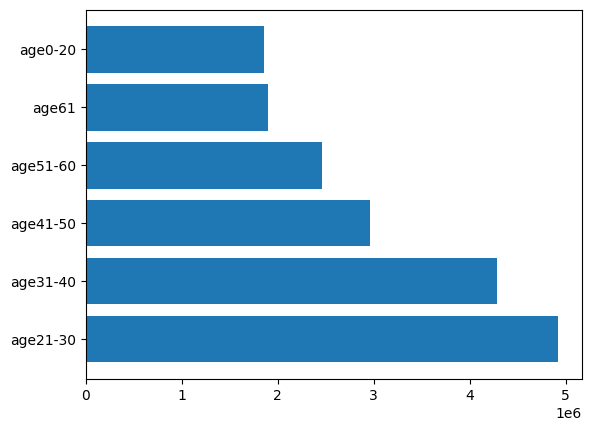

In [98]:
age = age.reset_index()
age = age.rename(columns={'index':"age",0:'total_visitors'})
age = age.sort_values('total_visitors',ascending=False)
plt.barh(age['age'],age['total_visitors'])
plt.show()

```
A horizontal bar chart was chosen for this visualization because we want to check which criteria most visitors fall under.
```

```
From the chart above, we can see that most visitors' ages are in the range of 21-30.
```

## WHAT MONTH DO MOST VISITORS COME ?

```
We can hold special events in certain months to attract more visitors.

We can use the 2019 data to analyze which month do most visitors come.
```

In [74]:
month = df[['date','visitor']][(df['date'].dt.year == 2019)]
month['date'] = month['date'].dt.month
month = month.rename(columns={'date':'month'})
month = month.groupby(['month']).sum()
month = month.reset_index()
month

,month,visitor
0,1,1104803
1,2,1201802
2,3,1535641
3,4,1635066
4,5,1485684
5,6,1476218
6,7,1448067
7,8,1586299
8,9,1459664
9,10,1656195


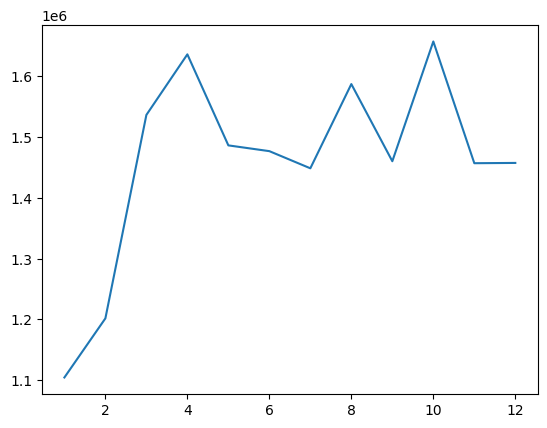

In [76]:
plt.plot(month['month'],month['visitor'])
plt.show()

```
Line chart was chosen for this visualization because we showed visitor numbers value compared to month in date which is continuous
```

```
For more detailed information, we sorted the months based on the number of visitors.
```

In [77]:
month = month.groupby(['month']).sum().sort_values('visitor',ascending=False)
month

,visitor
month,
10,1656195
4,1635066
8,1586299
3,1535641
5,1485684
6,1476218
9,1459664
12,1456888
11,1456429


```
We can see that visitor numbers peaked in September.
```

## NATION THAT SEND THE MOST VISITORS FOR STUDYING PURPOSE

```
We can increase our scholarships for countries that send the most students interested in studying in Korea, which could lead to recommendations or family visits, ultimately increasing total visitor numbers.
```

In [88]:
study = df[['nation','studying']]
study = study.groupby(['nation']).sum()
study = study.reset_index()
study = study.sort_values('studying',ascending=False)
study.head(10)

,nation,studying
12,China,277895
59,Vietnam,65316
27,Japan,16333
32,Mongolia,10679
58,Uzbekistan,8909
17,France,6753
56,USA,6396
52,Taiwan,5662
3,Asia others,4239
22,Indonesia,4207


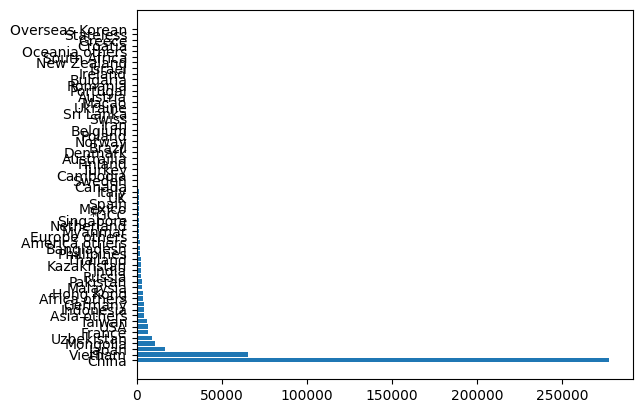

In [89]:
plt.barh(study['nation'],study['studying'])
plt.show()

```
Bar horizontal chart was chosen for this visualization because we showed discrete value and we want to see the nation name clearly.

But as we can see here, it is quite overwhelming due to the large number of nations.

So we'll only show top 10 nation.
```

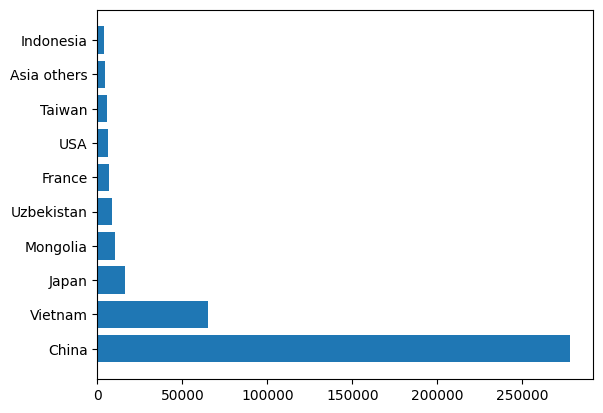

In [99]:
study = study.head(10).sort_values('studying',ascending=False)
plt.barh(study['nation'],study['studying'])
plt.show()

```
Now it is easier to analyze.

As from chart we know the top 10 nation that contributes the most visitors.
```

# CONCLUSION

```
In conclusion, achieving our goal of increasing total visitor numbers by 20% from the benchmark 2019 visitor range (1,970,942 to 955,562) can be accomplished through the following strategies:

- The main reason visitors come to Korea is for tourism, so we should focus on improving public facilities, public transportation, and tourist attractions to enhance their experience.

- Promoting tourism as a key reason for visiting. Establishing tourism cooperation with the top 10 nations that contribute the most visitors (China, Japan, Taiwan, USA, Hong Kong, Thailand, Vietnam, Philippines, Malaysia, Russia).

- Targeted promotional campaigns focusing on specific visitor demographics, such as females aged 21-30, will help increase engagement.

- Holding special events during peak months, like September, will also drive tourism.

- By strategically increasing scholarships for countries that send the most students to Korea (China, Vietnam, Japan, Mongolia, Uzbekistan, France, USA, Taiwan, Indonesia, and others), we can not only enhance educational exchange but also encourage family visits and positive recommendations. This approach will play a key role in achieving our goal of increasing total visitor numbers by 20%, strengthening both the academic and tourism sectors in Korea.
```

# TABLEAU

https://public.tableau.com/app/profile/nathaniel.andre/viz/VisitorInsightsDashboard/MAINDASHBOARD